<a href="https://colab.research.google.com/github/trantoan62/AI-CNN-TranQuocToan/blob/main/face_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import plotly.graph_objects as go
from keras.preprocessing.image import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/face_recognize/train'
test_path = '/content/drive/MyDrive/face_recognize/test'

In [5]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/face_recognize/train",
    target_size=(200, 200),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/face_recognize/test",
    target_size=(200, 200),
    batch_size=3,
    class_mode= "categorical",
    )

Found 143 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


In [7]:
train_dataset.classes
train_dataset.class_indices

{'Hoa': 0, 'Huy': 1, 'Toan': 2}

In [8]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [9]:
model.compile(loss = ['categorical_crossentropy'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [10]:
history=model.fit(train_dataset,epochs=20,batch_size=64,verbose=1,validation_data= test_dataset)

Epoch 1/20
48/48 [==============================] - 110s 2s/step - loss: 0.9267 - accuracy: 0.5385 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 2/20
48/48 [==============================] - 27s 558ms/step - loss: 0.4236 - accuracy: 0.9021 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 3/20
48/48 [==============================] - 27s 570ms/step - loss: 0.0388 - accuracy: 0.9860 - val_loss: 0.1997 - val_accuracy: 0.9245
Epoch 4/20
48/48 [==============================] - 26s 547ms/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0736 - val_accuracy: 0.9811
Epoch 5/20
48/48 [==============================] - 26s 546ms/step - loss: 0.2368 - accuracy: 0.9510 - val_loss: 0.4259 - val_accuracy: 0.8302
Epoch 6/20
48/48 [==============================] - 26s 548ms/step - loss: 0.1425 - accuracy: 0.9371 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 7/20
48/48 [==============================] - 26s 552ms/step - loss: 0.0617 - accuracy: 0.9790 - val_loss: 0.1469 - val_accuracy: 0.9434
E

In [11]:
model.save('face_recognize.h5')

In [12]:
labels = {0: 'Hoa', 
          1: 'Huy', 
          2: 'Toan'}

This is:  Hoa


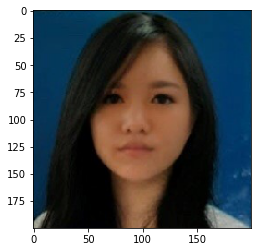

In [17]:
img = load_img('/content/hoa1.jpg', target_size =(200, 200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200, 200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  Hoa


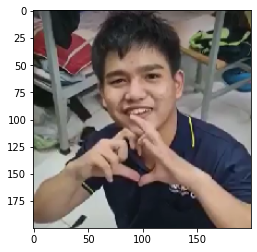

In [24]:
img = load_img('/content/hoa.png', target_size =(200, 200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200, 200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  Toan


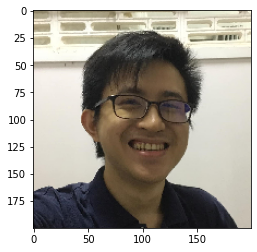

In [20]:
img = load_img('/content/toan.jpg', target_size =(200, 200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200, 200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  Huy


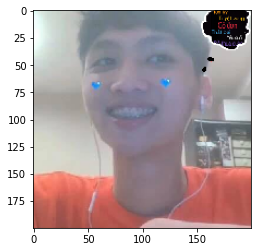

In [22]:
img = load_img('/content/huyy.png', target_size =(200, 200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200, 200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])